In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('smartprix_phones_cleaned.csv')

In [80]:
df

,brand_name,model,price,rating,5G,nfc,ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,resolution,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,os
0,motorola,Motorola Edge 60 Pro,29999,82.0,True,True,False,dimensity,8,3.35,...,6.70,1220 x 2712,120.0,3,1,50.0,50.0,0,NaN,android
1,vivo,Vivo T4 5G,21999,81.0,True,False,True,snapdragon,8,2.50,...,6.77,1080 x 2392,120.0,2,1,50.0,32.0,0,NaN,android
2,samsung,Samsung Galaxy S24 FE 5G,35558,86.0,True,True,False,exynos,10,3.11,...,6.70,1080 x 2340,120.0,3,1,50.0,10.0,0,NaN,android
3,motorola,Motorola Edge 60 Stylus,22990,88.0,True,True,False,snapdragon,8,2.40,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android
4,motorola,Motorola Edge 60 Fusion,24598,86.0,True,False,False,dimensity,8,2.50,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,itel,itel A50C,5549,NaN,False,False,False,unisoc,8,NaN,...,6.56,720 x 1612,60.0,1,1,8.0,5.0,1,NaN,android
898,itel,itel A50,5999,NaN,False,False,False,unisoc,8,NaN,...,6.60,720 x 1612,90.0,2,1,8.0,5.0,1,NaN,android
899,vivo,Vivo Y18i,8749,NaN,False,False,False,unisoc,8,NaN,...,6.56,720 x 1612,90.0,2,1,13.0,5.0,1,NaN,android
900,realme,Realme Narzo N63,8499,NaN,False,True,False,unisoc,8,1.80,...,6.75,720 x 1600,90.0,2,1,50.0,8.0,1,1024.0,android


## Uni-Variate Analysis

### Brand Name

<Axes: xlabel='brand_name'>

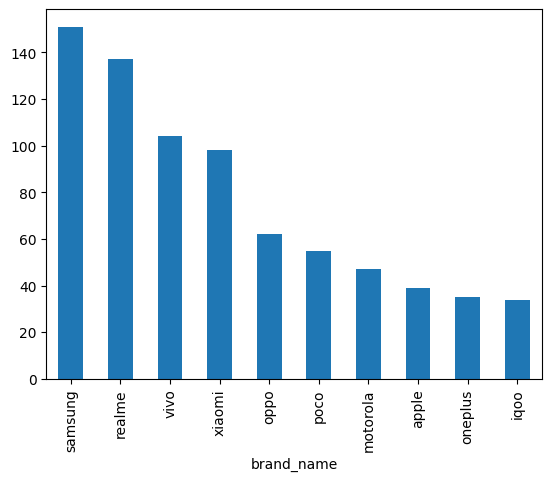

In [81]:
# Plot a graph about top 5 brand

df.brand_name.value_counts().head(10).plot(kind='bar')

<Axes: ylabel='count'>

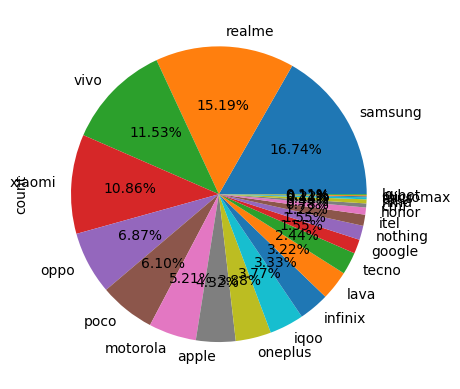

In [82]:
# Pie Chart

df.brand_name.value_counts().plot(kind='pie', autopct="%0.2f%%")

In [83]:
df.brand_name.isnull().sum()

np.int64(0)

### Model

In [84]:
df.model.nunique()

902

### Price

- Price columns is heavily skewed.
- There are few outliers.

In [85]:
df.price.describe()

count       902.000000
mean      28622.236142
std       28639.078597
min        5499.000000
25%       12580.250000
50%       19894.500000
75%       29999.000000
max      200999.000000
Name: price, dtype: float64

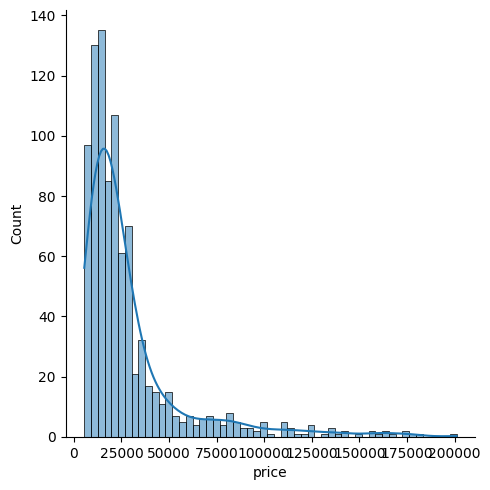

In [86]:
sns.displot(kind='hist', data=df, x ='price', kde=True)

In [87]:
df['price'].skew()

np.float64(2.8022127423622045)

<Axes: ylabel='price'>

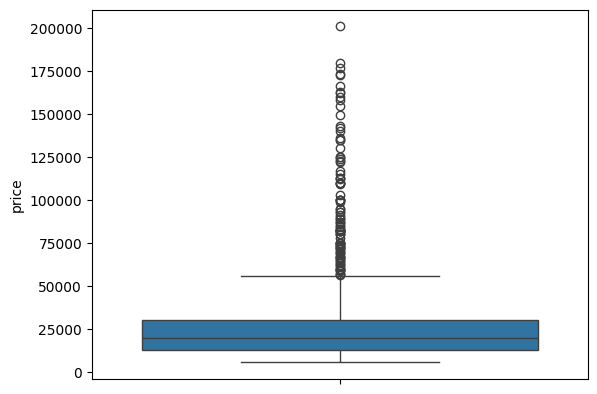

In [88]:
sns.boxplot(df['price'])

In [89]:
df[df['price'] > 200000]

,brand_name,model,price,rating,5G,nfc,ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,resolution,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,os
521,samsung,Samsung Galaxy Z Fold 6 (12GB RAM + 1TB),200999,93.0,True,True,False,snapdragon,8,3.39,...,7.6,1856 x 2160,120.0,3,2,50.0,10.0,0,NaN,others


In [90]:
df.price.isnull().sum()

np.int64(0)

### Rating

- The distribution is near to normal
- There are few outliers.
- There are 33% missing values.

In [91]:
df['rating'].describe()

count    599.000000
mean      85.415693
std        3.662495
min       80.000000
25%       83.000000
50%       85.000000
75%       88.000000
max       98.000000
Name: rating, dtype: float64

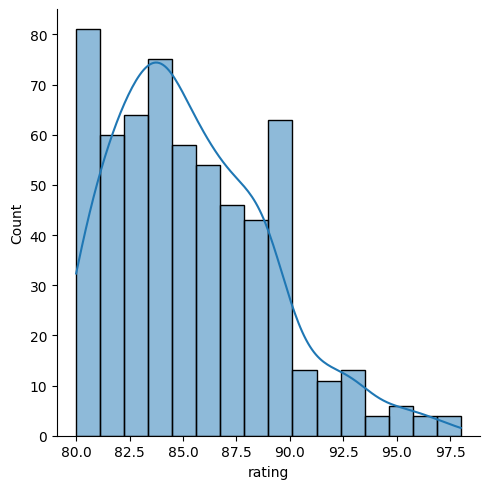

In [92]:
sns.displot(kind='hist', data=df, x ='rating', kde=True)

In [93]:
df['price'].skew()

np.float64(2.8022127423622045)

<Axes: ylabel='rating'>

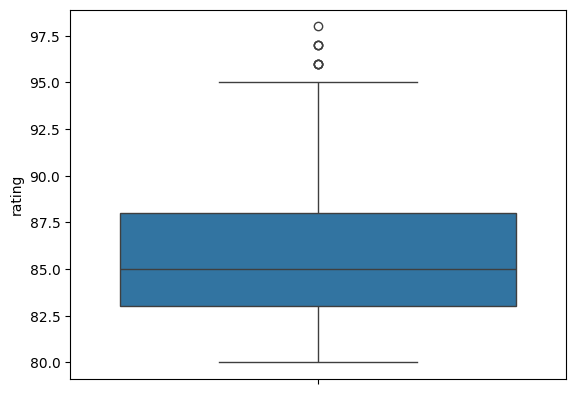

In [94]:
sns.boxplot(df['rating'])

In [95]:
(df.rating.isnull().sum()/902 ) * 100

np.float64(33.5920177383592)

### 5G, NFC, IR Blaster

<Axes: ylabel='count'>

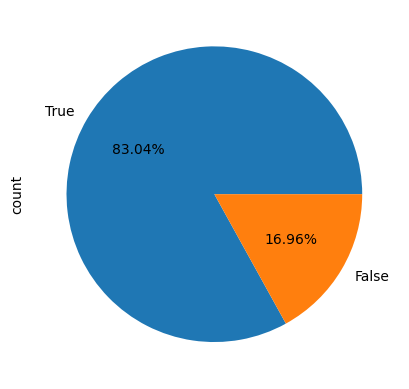

In [96]:
df['5G'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

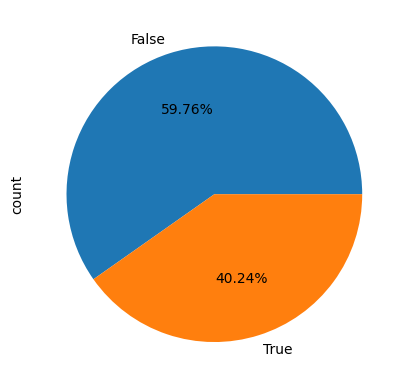

In [97]:
df['nfc'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

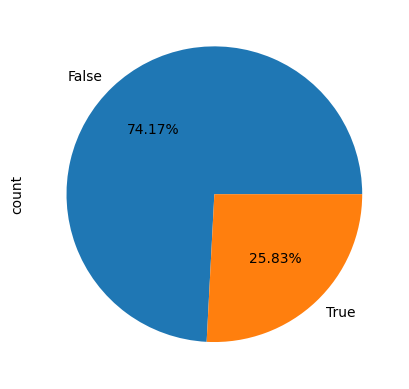

In [98]:
df['ir_blaster'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [99]:
df[df['ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     76
poco       39
oneplus    20
oppo       20
iqoo       17
vivo       17
infinix    16
tecno      14
realme     12
honor       2
Name: count, dtype: int64

### Processor Brand

In [100]:
df['processor_brand'].value_counts()

processor_brand
dimensity     345
snapdragon    335
exynos         56
helio          56
unisoc         41
bionic         36
tensor         12
tiger           6
google          2
dimensit        2
a13             2
qualcomm        2
spreadtrum      1
apple           1
Name: count, dtype: int64

In [101]:
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('a13', 'apple')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('dimensit', 'dimensity')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('google', 'tensor')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('spreadtrum', 'unisoc')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('qualcomm', 'snapdragon')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('dimensityy', 'dimensity')
df['processor_brand'] = df['processor_brand'].str.strip().str.replace('apple', 'bionic')

<Axes: ylabel='count'>

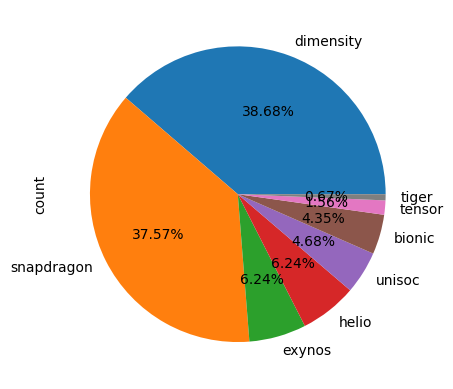

In [102]:
df['processor_brand'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

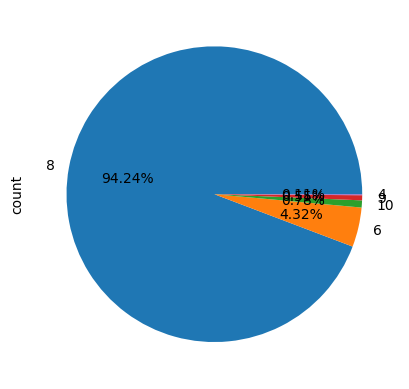

In [103]:
df['num_cores'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

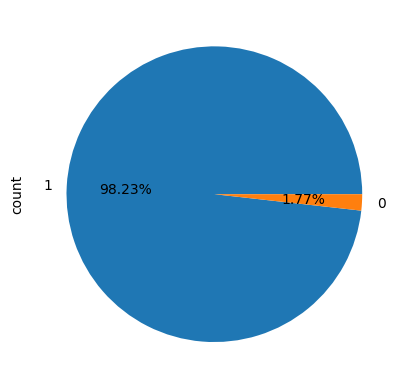

In [104]:
df['fast_charging_available'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

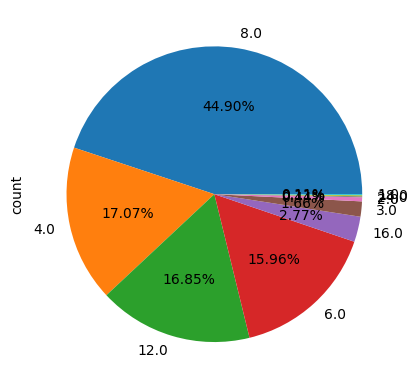

In [105]:
df['ram_'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

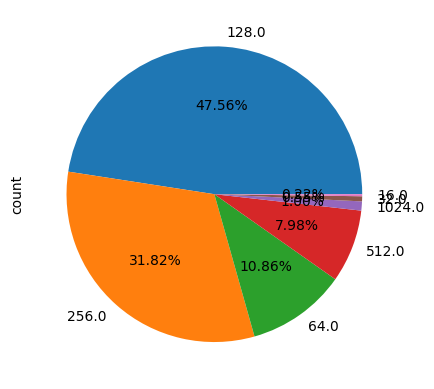

In [106]:
df['rom_'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

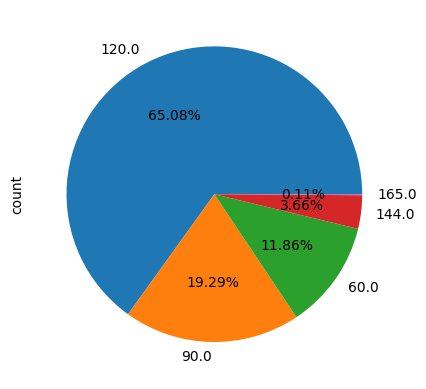

In [107]:
df['refresh_rate'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

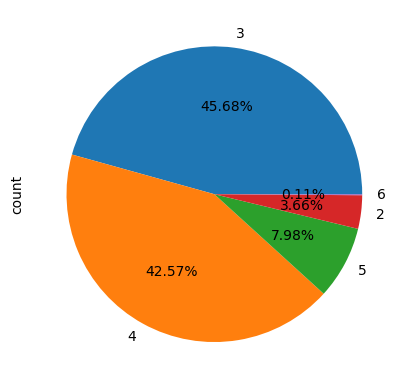

In [108]:
(df['rear_cam_num'] + df['front_cam_num']).value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

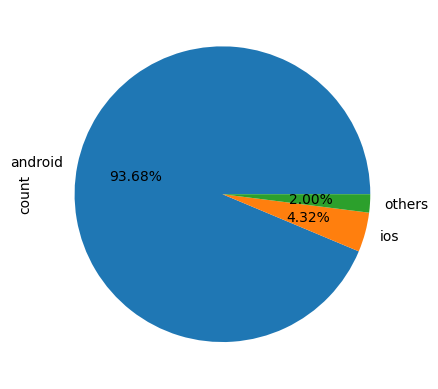

In [109]:
df['os'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

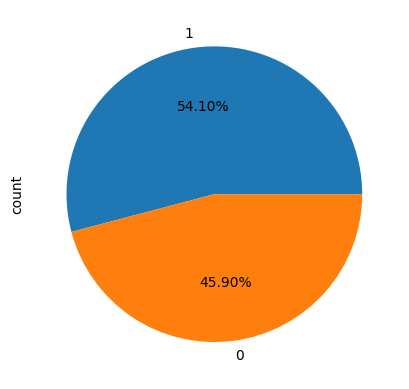

In [110]:
df['extended_memory_available'].value_counts().plot(kind='pie', autopct='%0.2f%%')

<Axes: ylabel='count'>

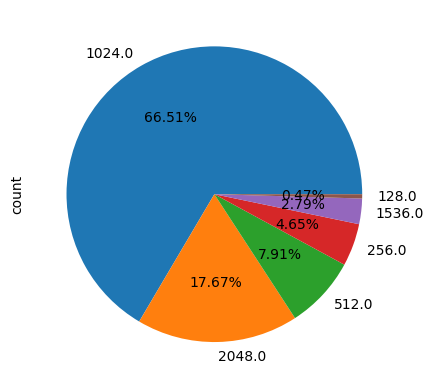

In [111]:
df['extended_upto'].value_counts().plot(kind='pie', autopct='%0.2f%%')

In [112]:
def plot_graphs(column_name):
    
    sns.displot(kind='hist', kde=True, data=df, x=column_name, label=column_name)
    sns.catplot(kind='box',data=df, x=column_name)

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


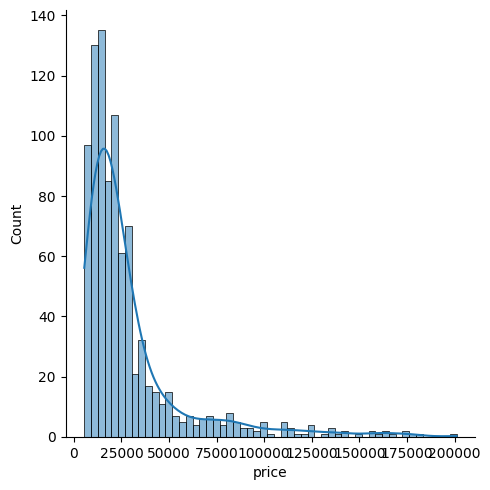

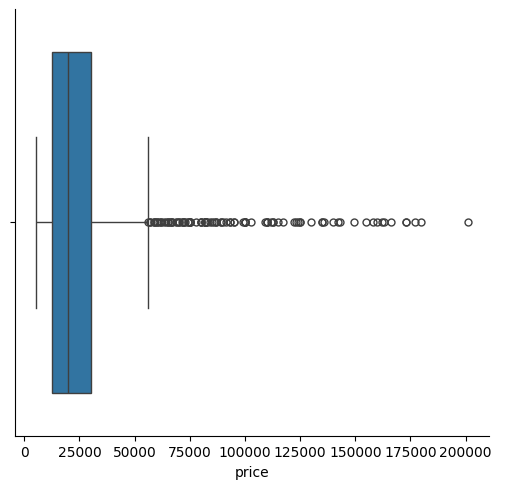

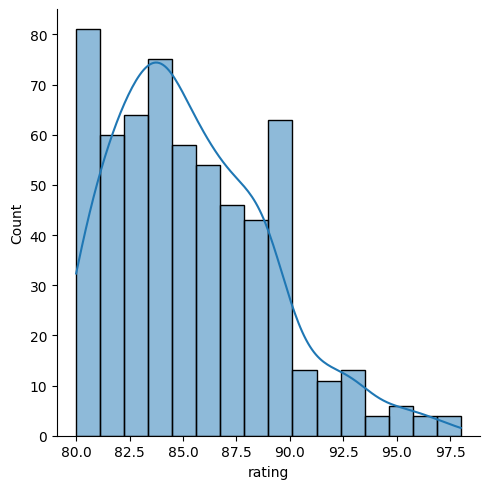

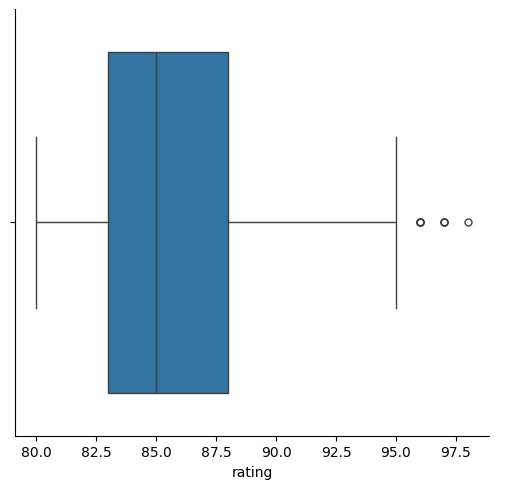

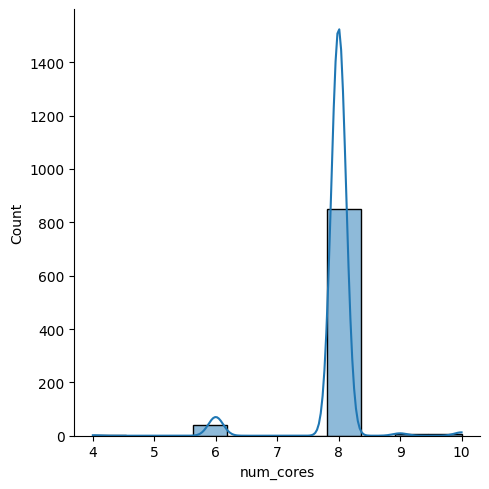

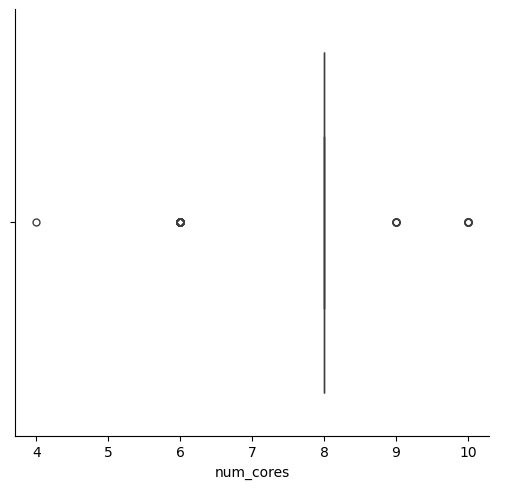

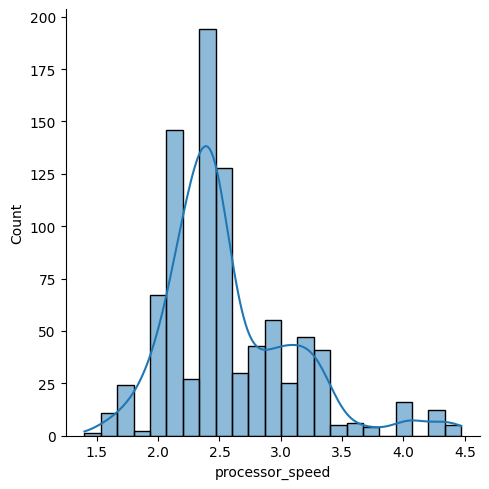

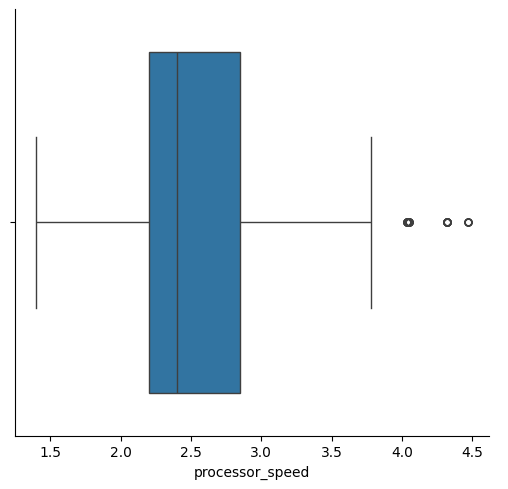

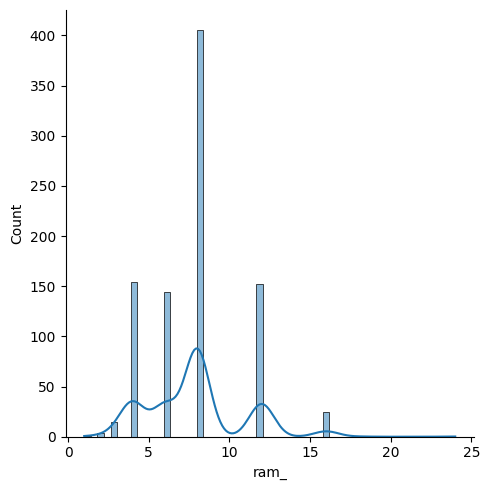

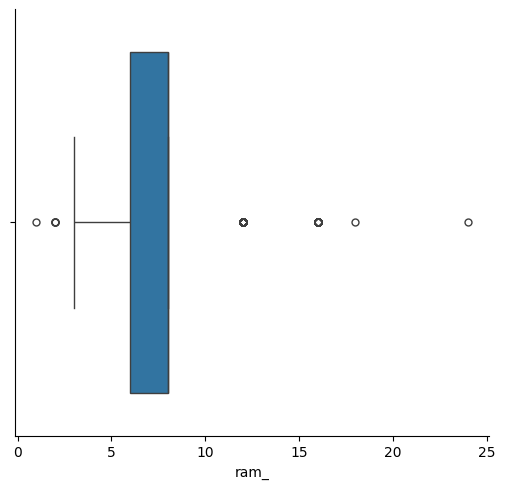

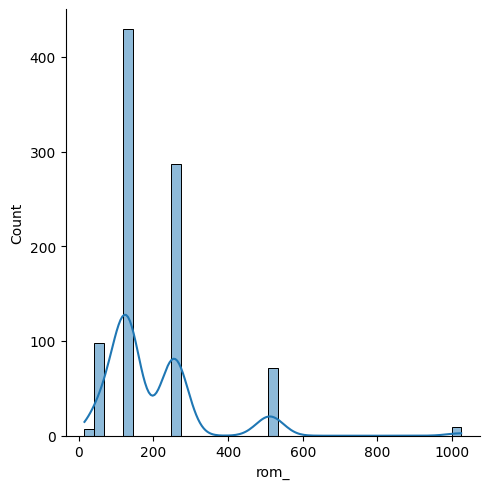

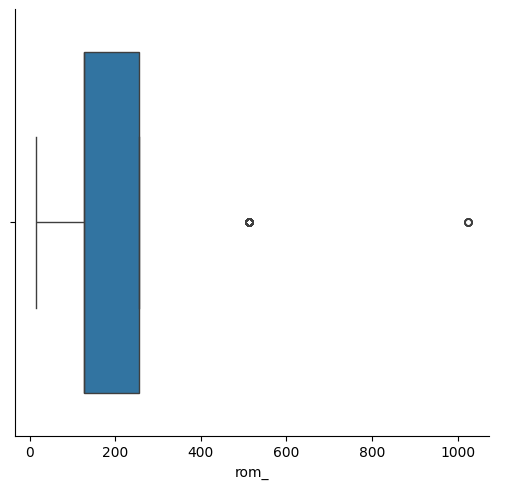

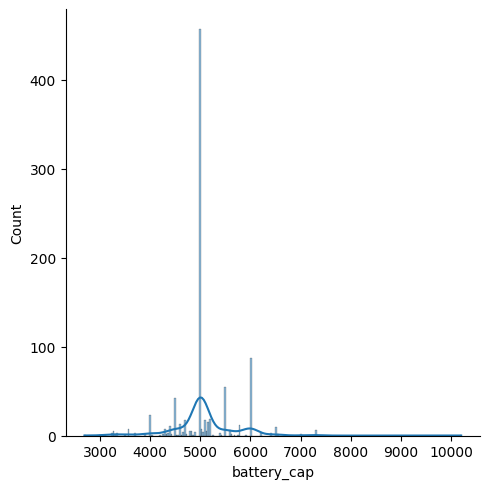

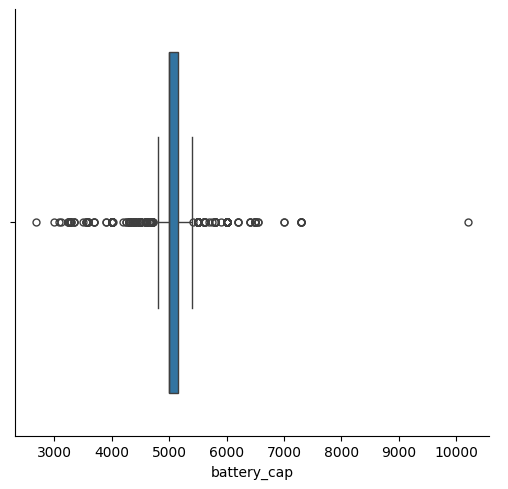

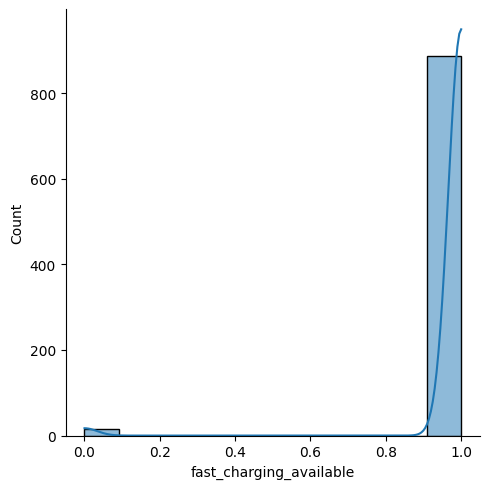

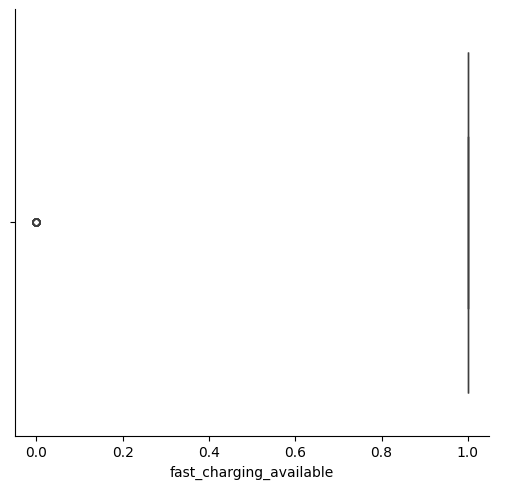

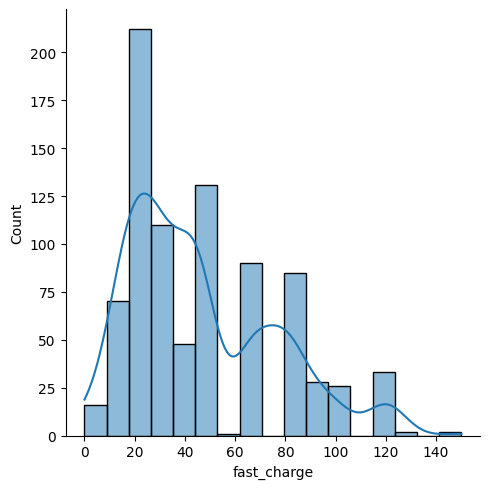

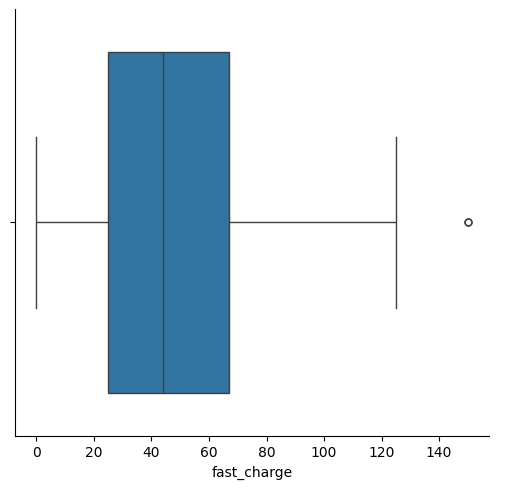

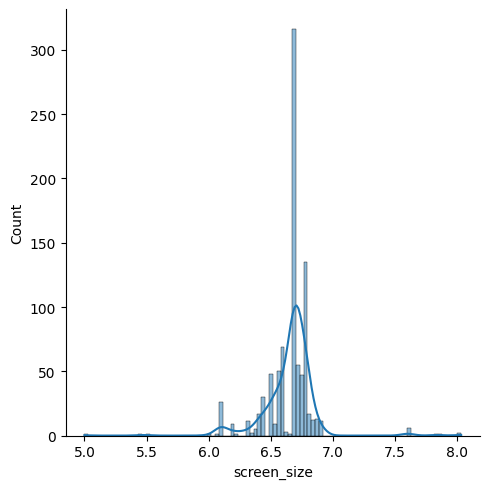

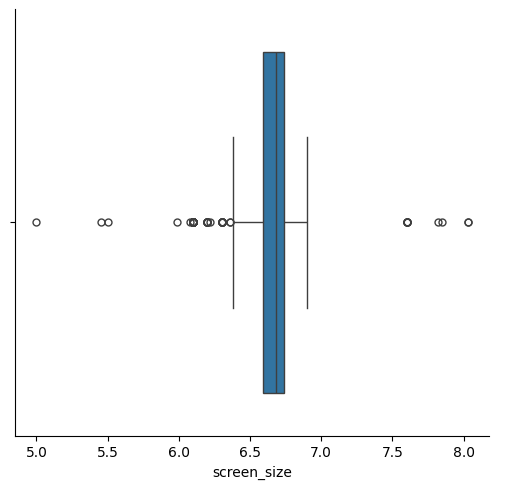

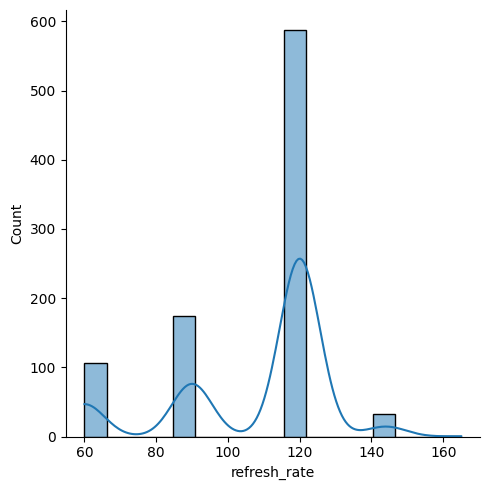

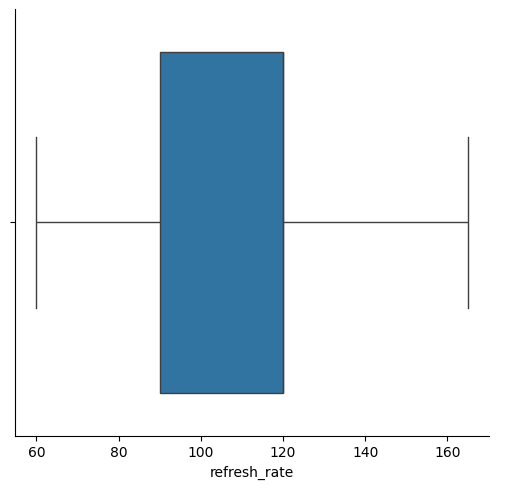

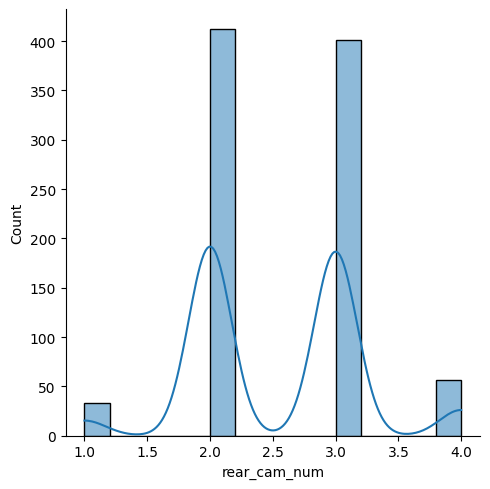

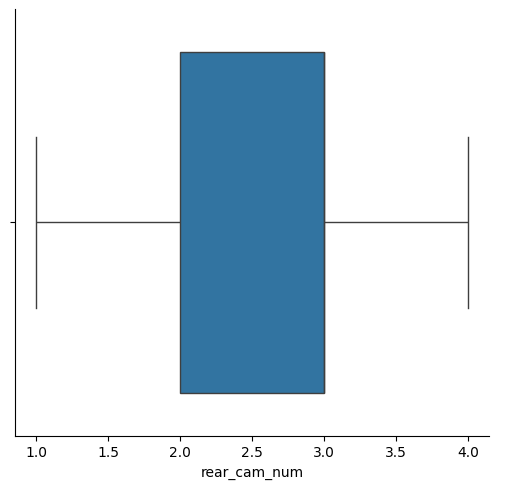

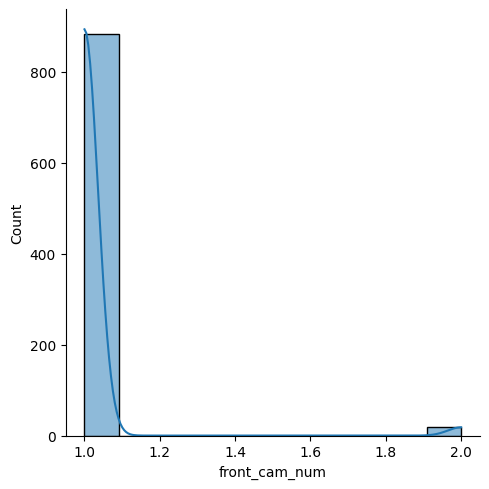

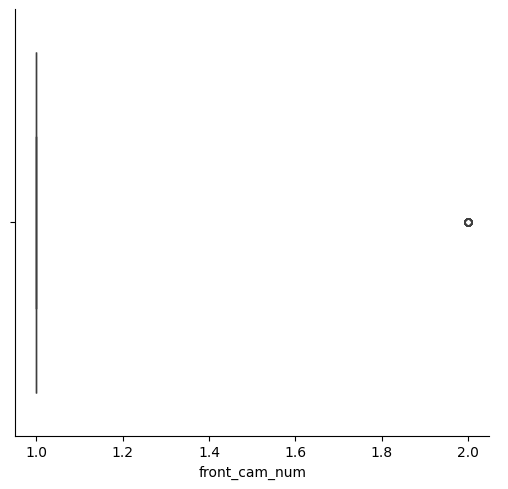

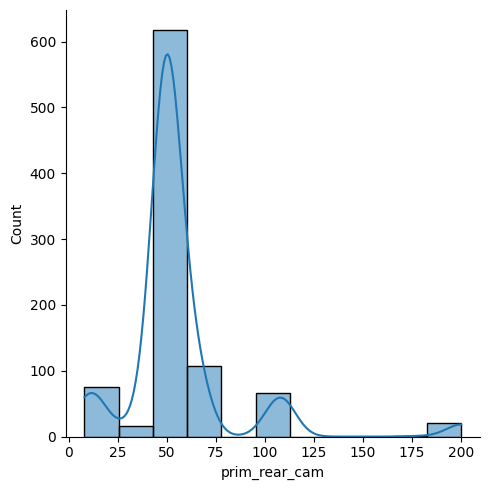

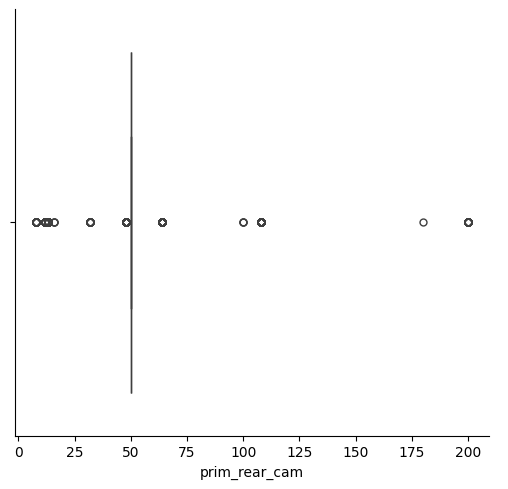

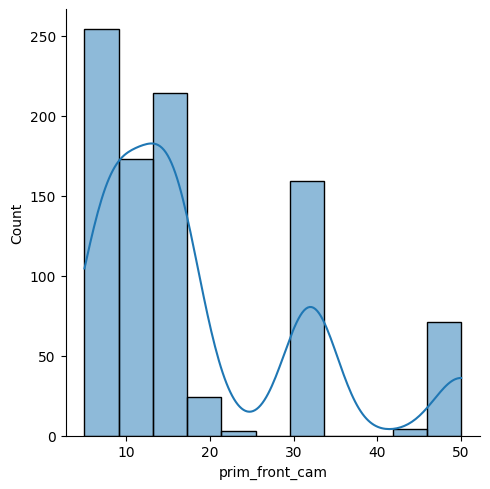

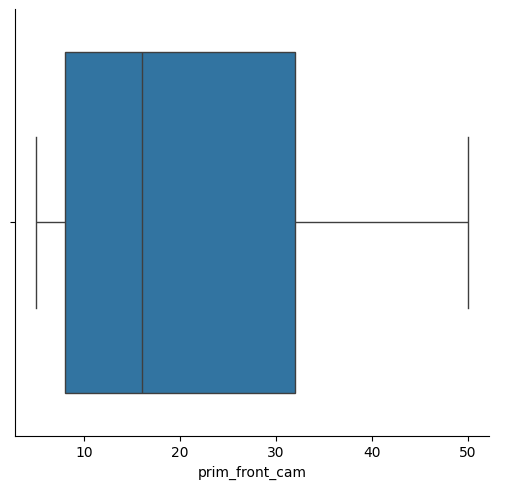

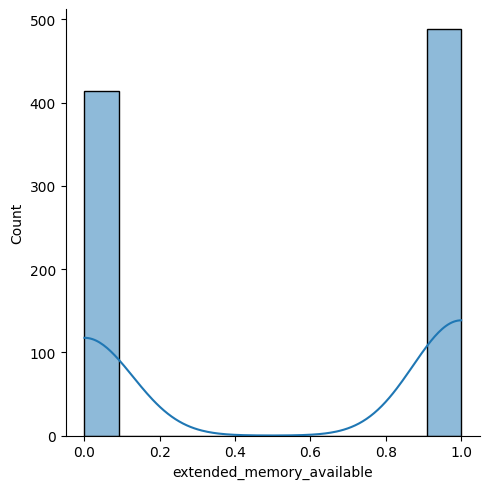

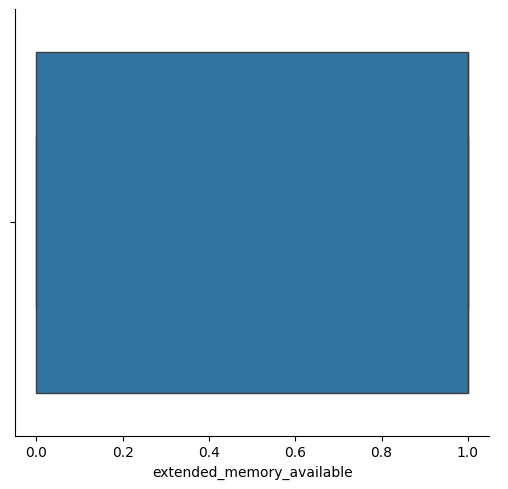

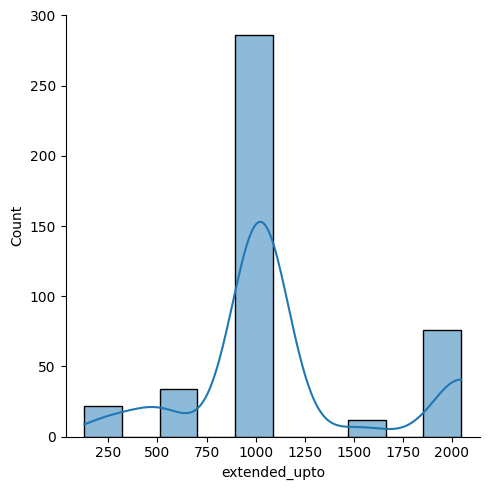

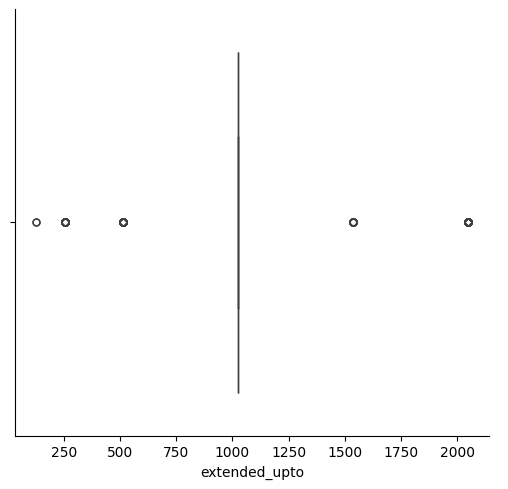

In [113]:
num_columns = df.select_dtypes(include=['float64','int64']).columns

for col in num_columns:
    plot_graphs(col)

## Bi-Variate Analysis

In [114]:
df.head()

,brand_name,model,price,rating,5G,nfc,ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,resolution,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,os
0,motorola,Motorola Edge 60 Pro,29999,82.0,True,True,False,dimensity,8,3.35,...,6.70,1220 x 2712,120.0,3,1,50.0,50.0,0,NaN,android
1,vivo,Vivo T4 5G,21999,81.0,True,False,True,snapdragon,8,2.50,...,6.77,1080 x 2392,120.0,2,1,50.0,32.0,0,NaN,android
2,samsung,Samsung Galaxy S24 FE 5G,35558,86.0,True,True,False,exynos,10,3.11,...,6.70,1080 x 2340,120.0,3,1,50.0,10.0,0,NaN,android
3,motorola,Motorola Edge 60 Stylus,22990,88.0,True,True,False,snapdragon,8,2.40,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android
4,motorola,Motorola Edge 60 Fusion,24598,86.0,True,False,False,dimensity,8,2.50,...,6.70,1220 x 2712,120.0,2,1,50.0,32.0,1,1024.0,android


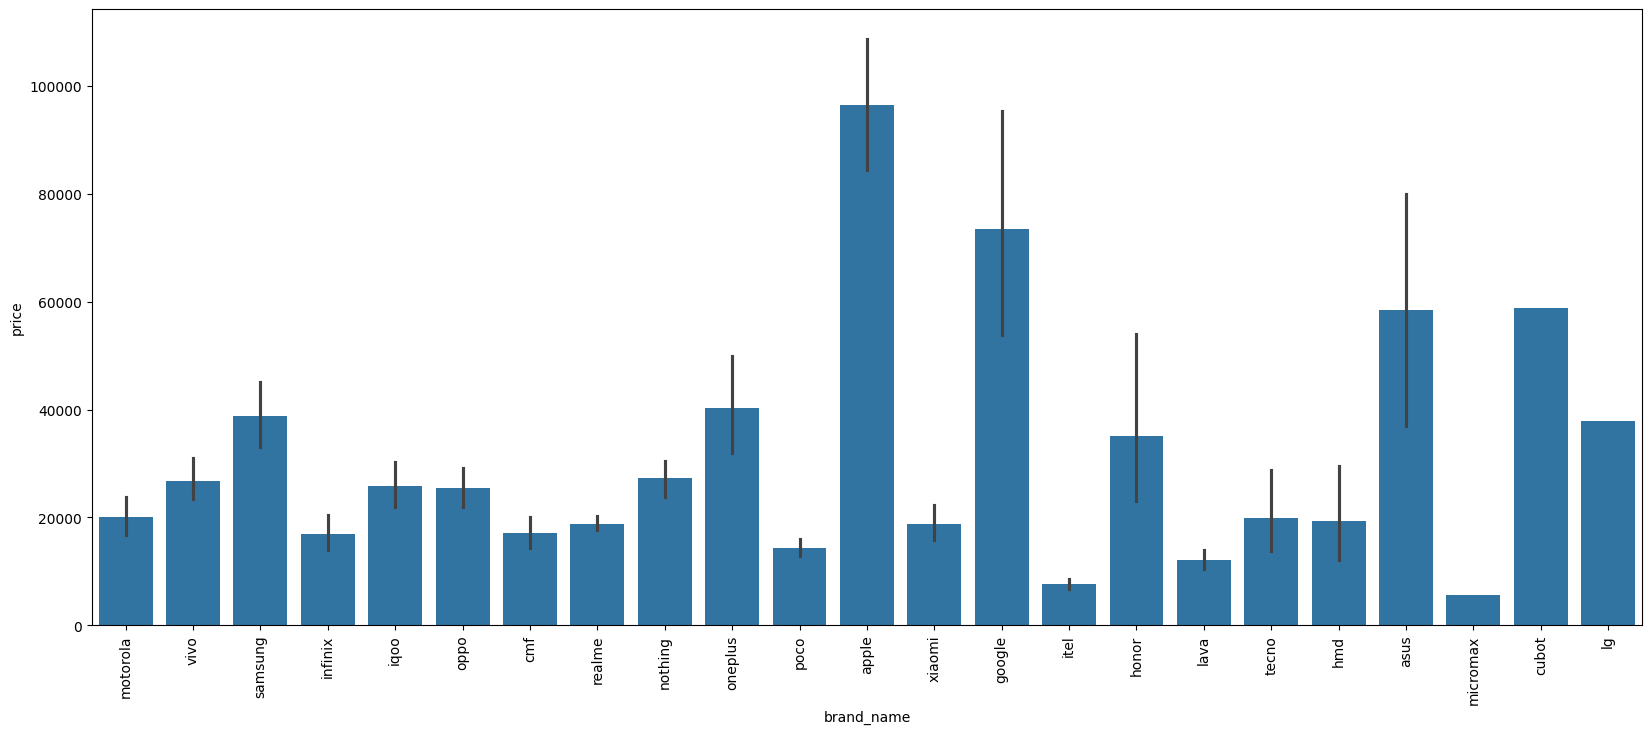

In [115]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='brand_name', y='price')
plt.xticks(rotation = 'vertical')
plt.show()

In [116]:
x = df.groupby('brand_name').count()['model']

In [117]:

temp_df = df[df['brand_name'].isin(x[x > 10].index)]

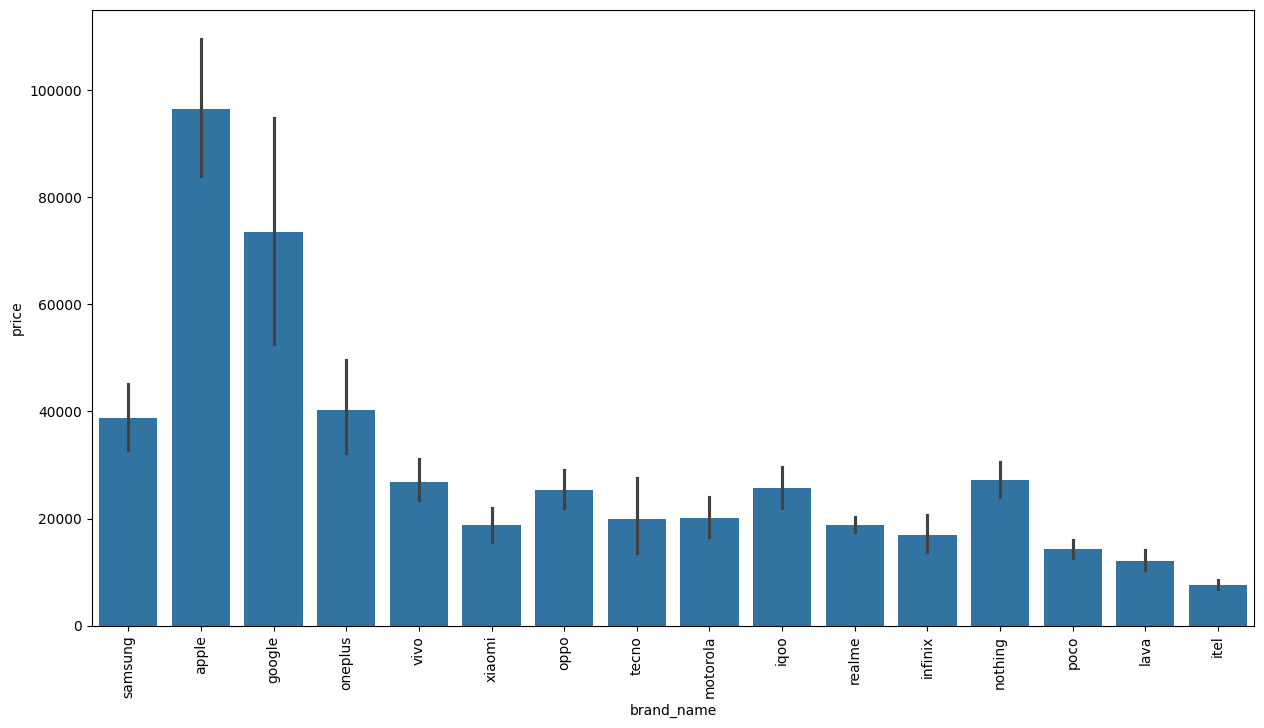

In [118]:
plt.figure(figsize=(15,8))
sns.barplot(data=temp_df.sort_values('price', ascending=False), x='brand_name', y='price')
plt.xticks(rotation = 'vertical')
plt.show()

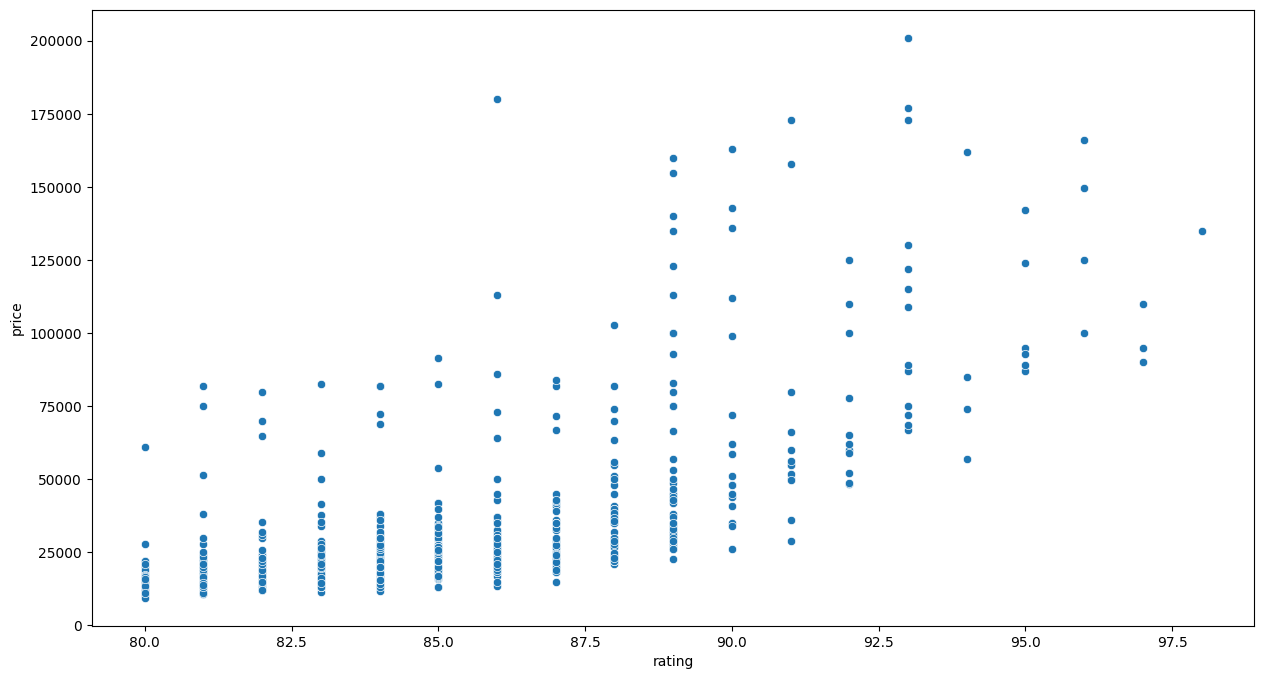

In [119]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='rating', y='price')
plt.show()

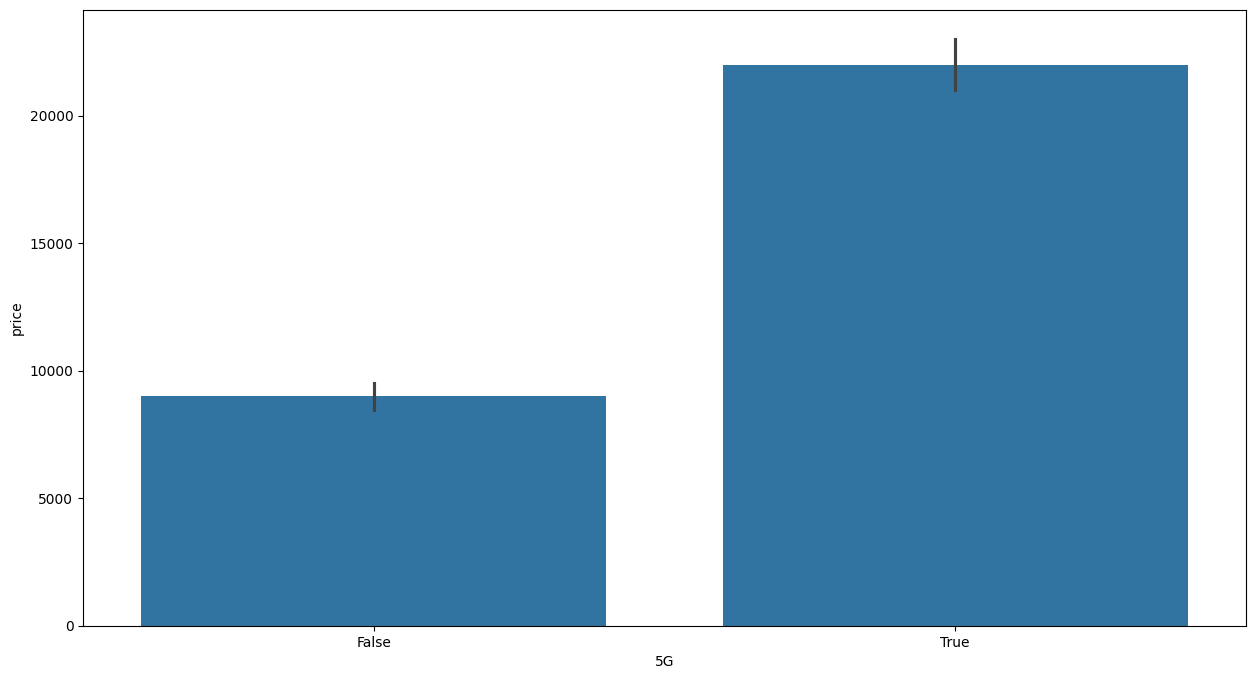

In [120]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='5G', y='price', estimator=np.median)
plt.show()

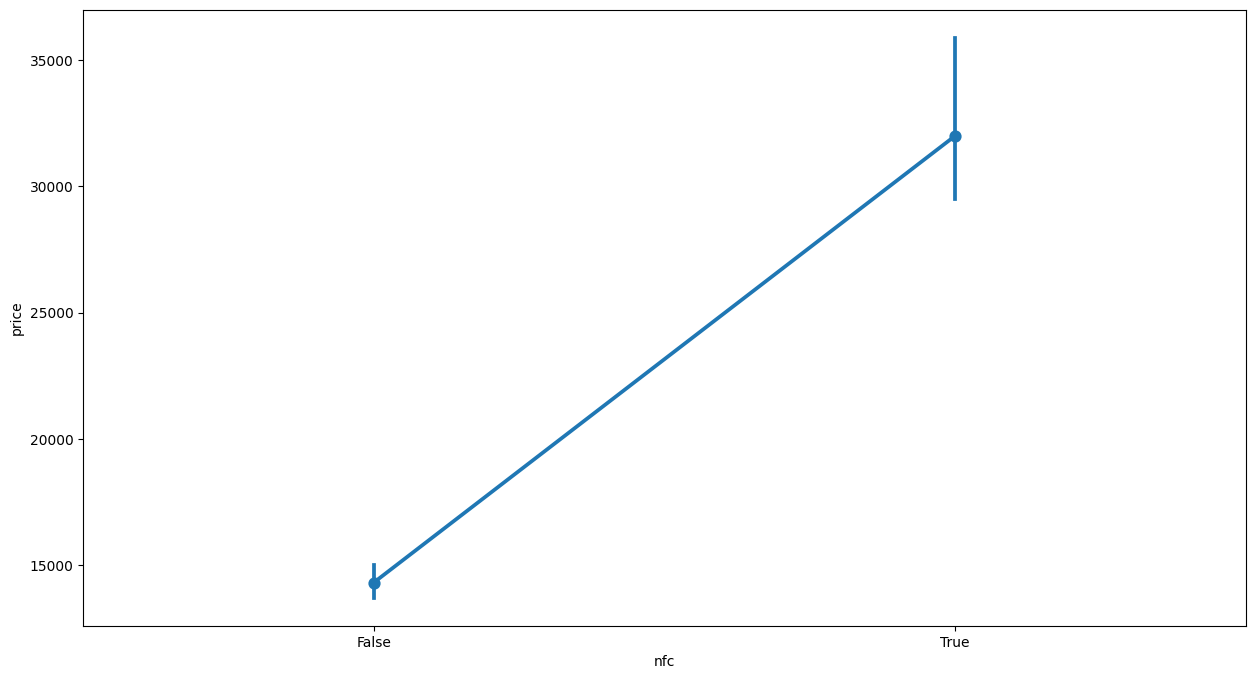

In [121]:
plt.figure(figsize=(15,8))
sns.pointplot(data=df, x='nfc', y='price', estimator=np.median)
plt.show()

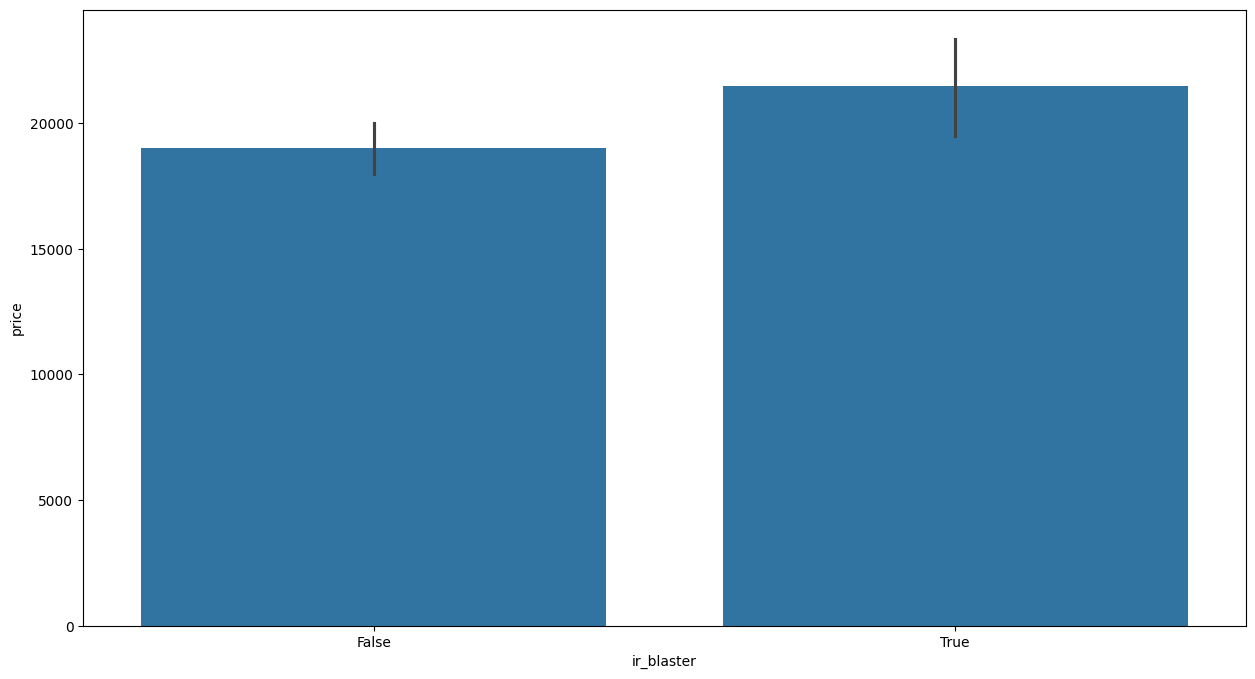

In [122]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='ir_blaster', y='price', estimator=np.median)
plt.show()

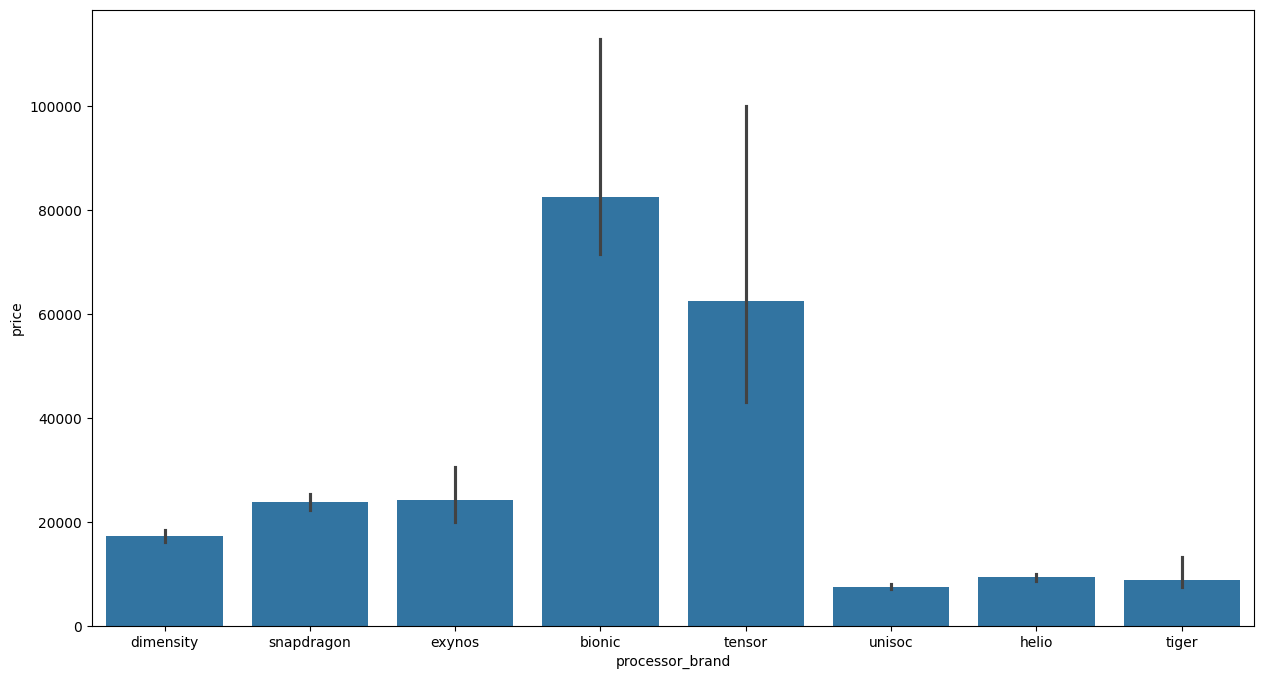

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='processor_brand', y='price', estimator=np.median)
plt.show()

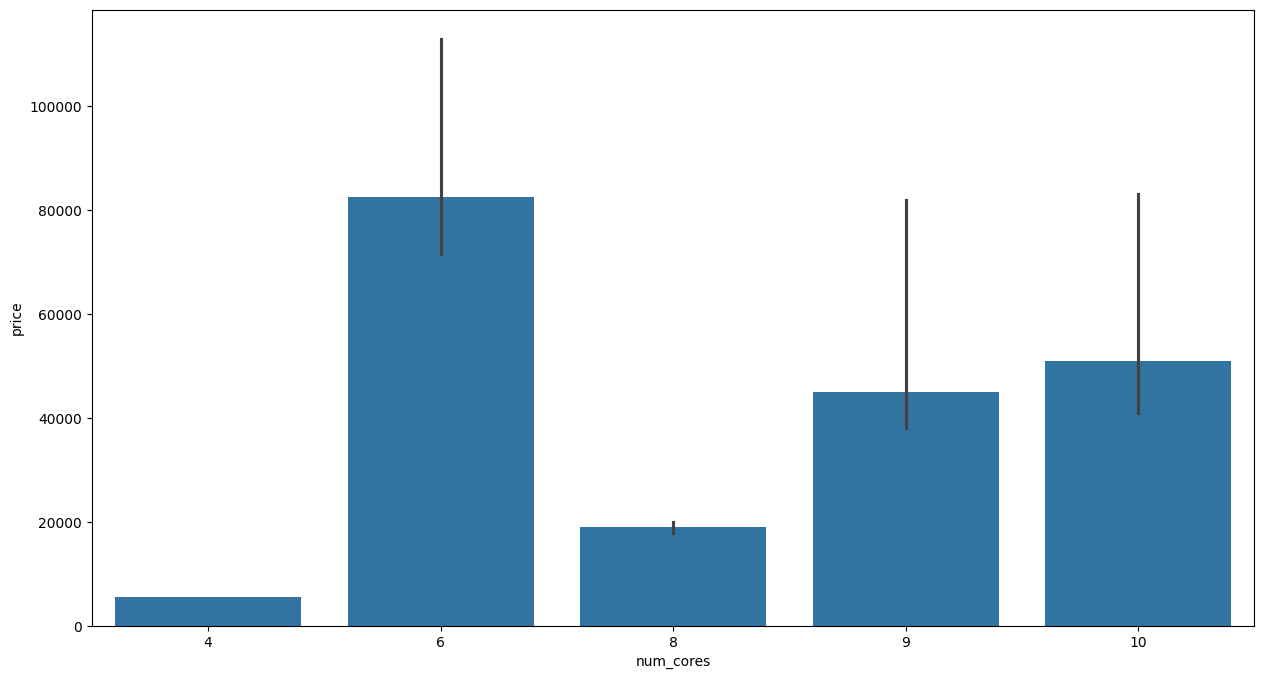

In [128]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='num_cores', y='price', estimator=np.median)
plt.show()

In [126]:
pd.crosstab(df['num_cores'], df['os'])

os,android,ios,others
num_cores,,,
4,1,0,0
6,0,39,0
8,832,0,18
9,5,0,0
10,7,0,0


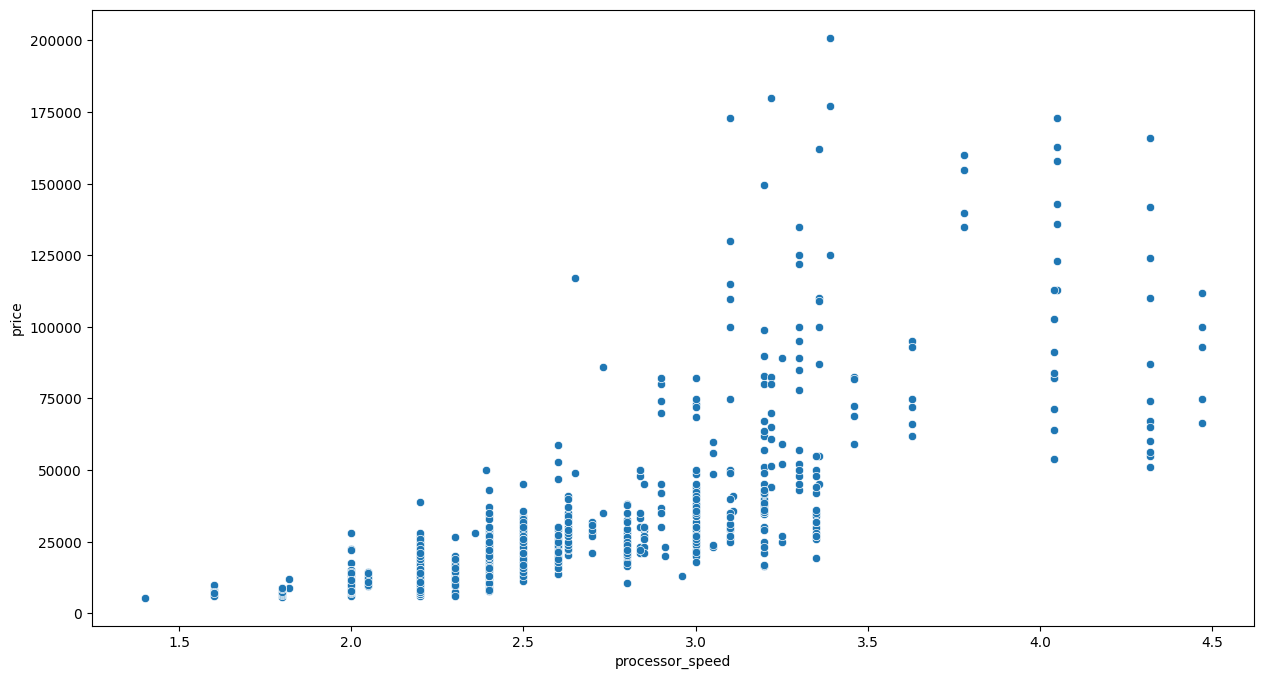

In [130]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='processor_speed', y='price')
plt.show()

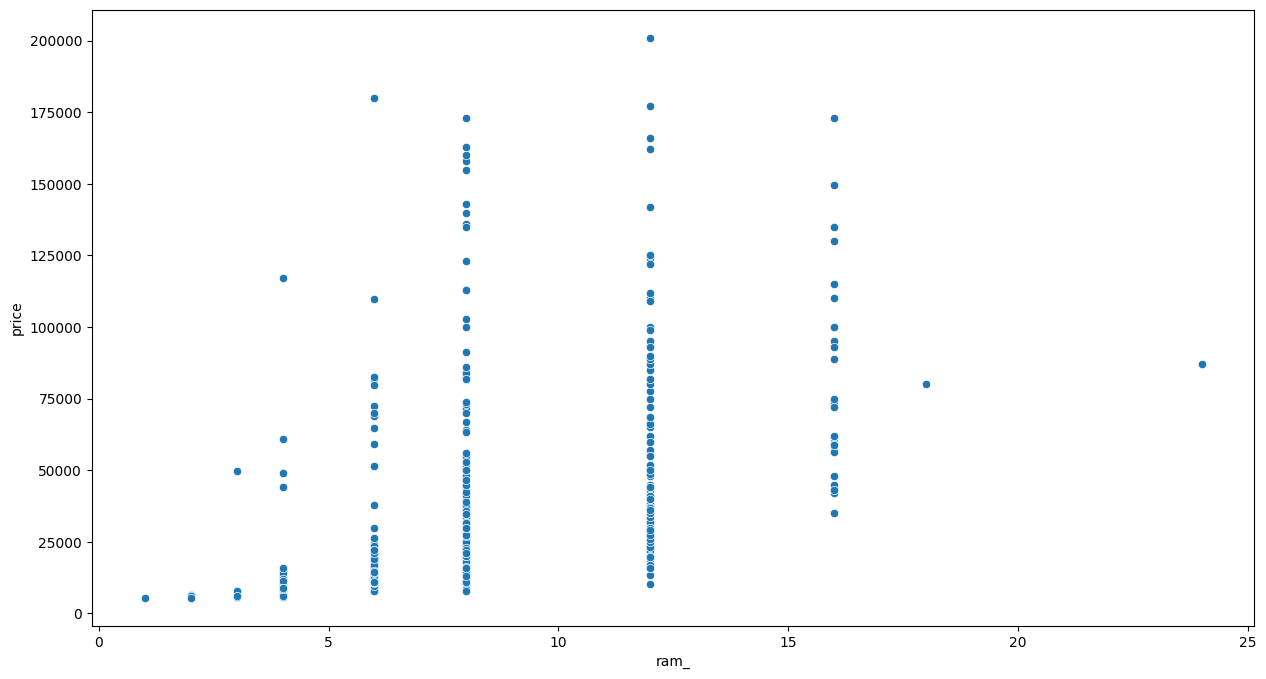

In [131]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='ram_', y='price')
plt.show()

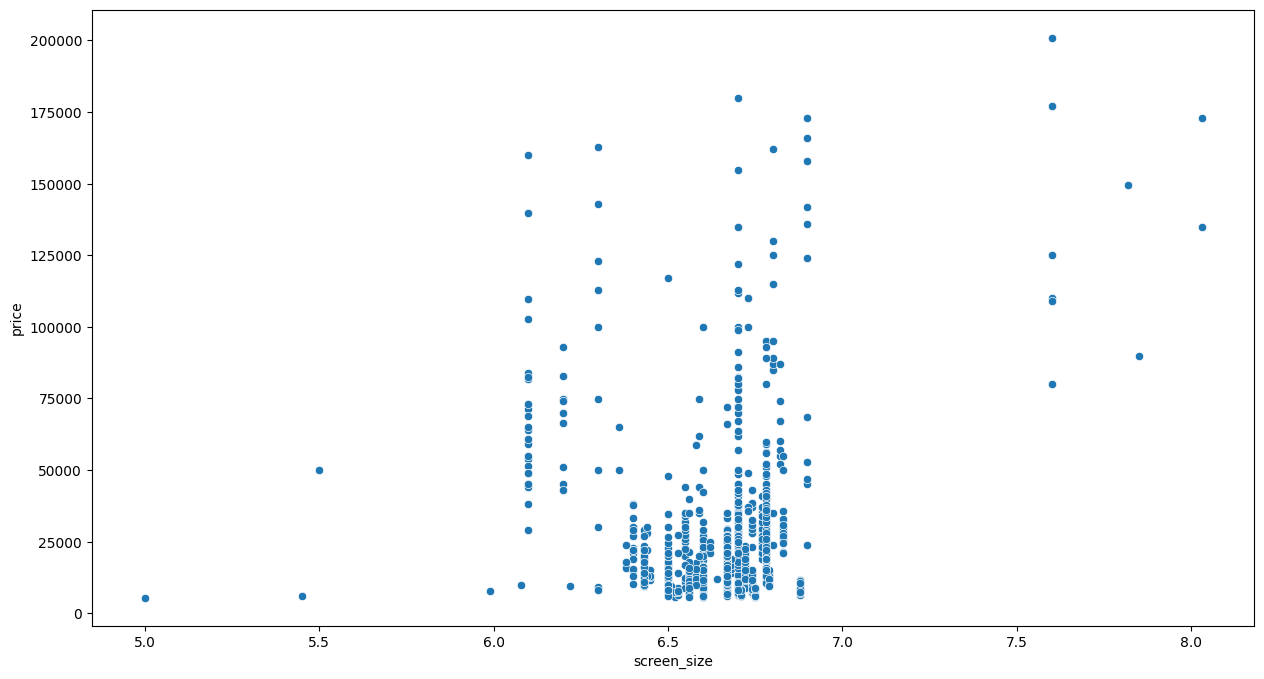

In [132]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='screen_size', y='price')
plt.show()

<Axes: >

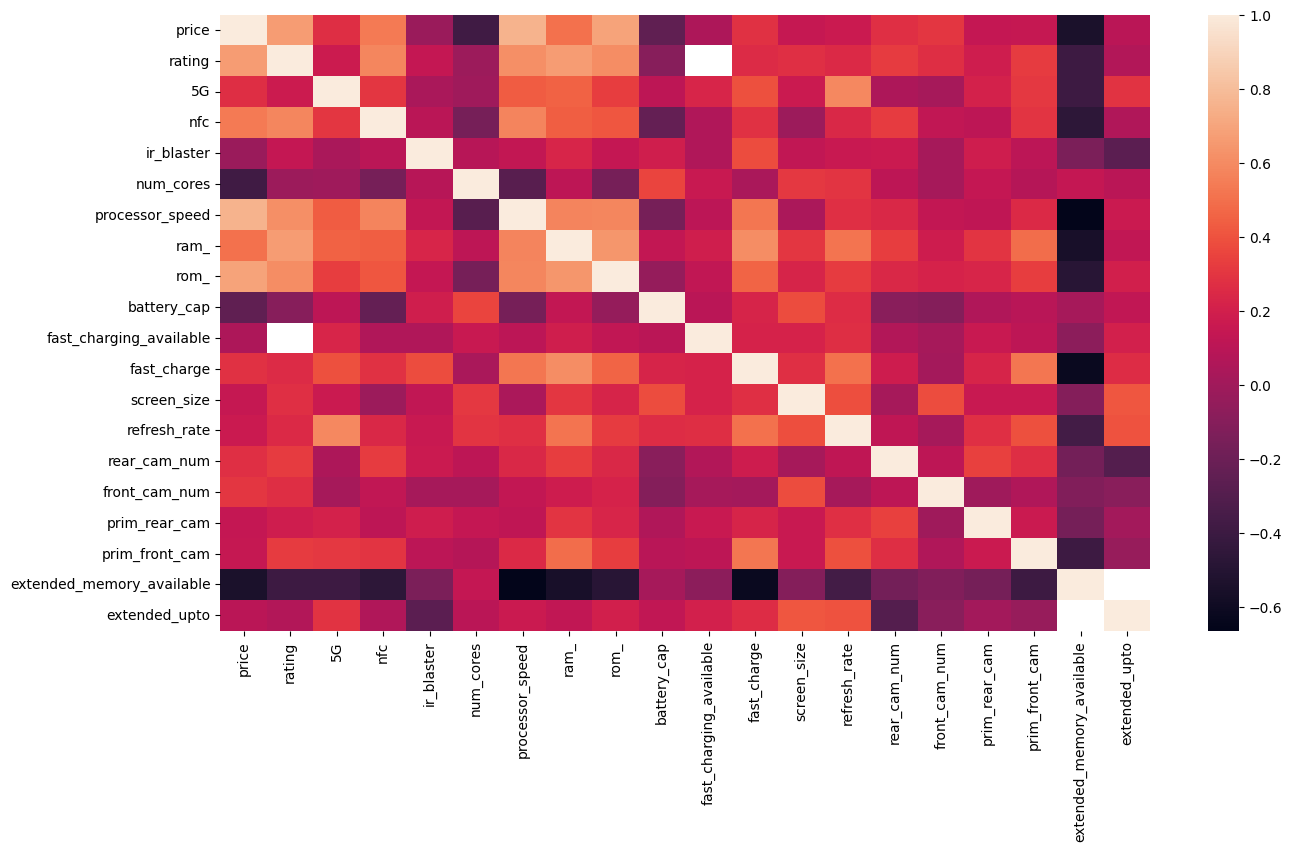

In [139]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])
plt.figure(figsize=(15,8))
sns.heatmap(numeric_df.corr())

In [140]:
numeric_df.corr()['price']

price                        1.000000
rating                       0.664405
5G                           0.266489
nfc                          0.533945
ir_blaster                  -0.022182
num_cores                   -0.380420
processor_speed              0.753369
ram_                         0.500768
rom_                         0.692508
battery_cap                 -0.251684
fast_charging_available      0.045049
fast_charge                  0.283086
screen_size                  0.147793
refresh_rate                 0.166105
rear_cam_num                 0.274176
front_cam_num                0.303061
prim_rear_cam                0.137521
prim_front_cam               0.145277
extended_memory_available   -0.543651
extended_upto                0.099013
Name: price, dtype: float64

In [141]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       303
5G                             0
nfc                            0
ir_blaster                     0
processor_brand                5
num_cores                      0
processor_speed               13
ram_                           0
rom_                           0
battery_cap                    2
fast_charging_available        0
fast_charge                   48
screen_size                    0
resolution                     0
refresh_rate                   0
rear_cam_num                   0
front_cam_num                  0
prim_rear_cam                  0
prim_front_cam                 0
extended_memory_available      0
extended_upto                472
os                             0
dtype: int64

In [142]:
numeric_df.corr()['rating']

price                        0.664405
rating                       1.000000
5G                           0.174410
nfc                          0.580082
ir_blaster                   0.139049
num_cores                   -0.016229
processor_speed              0.616308
ram_                         0.662199
rom_                         0.609274
battery_cap                 -0.095493
fast_charging_available           NaN
fast_charge                  0.254419
screen_size                  0.275749
refresh_rate                 0.249860
rear_cam_num                 0.319732
front_cam_num                0.269048
prim_rear_cam                0.184560
prim_front_cam               0.317651
extended_memory_available   -0.392186
extended_upto                0.069626
Name: rating, dtype: float64

#### Multi Variant Imputation

In [146]:
from sklearn.impute import KNNImputer

In [ ]:
# KNN Imputer

x_df = df.select_dtypes(include=['int64', 'float64']).drop(columns='price')

In [148]:
imputer = KNNImputer(n_neighbors=5)

In [150]:
x_df_values = imputer.fit_transform(x_df)

In [156]:
x_df = pd.DataFrame(x_df_values, columns=x_df.columns)

In [157]:
x_df['price'] = df['price']

In [158]:
x_df.head()

,rating,num_cores,processor_speed,ram_,rom_,battery_cap,fast_charging_available,fast_charge,screen_size,refresh_rate,rear_cam_num,front_cam_num,prim_rear_cam,prim_front_cam,extended_memory_available,extended_upto,price
0,82.0,8.0,3.35,8.0,256.0,6000.0,1.0,90.0,6.70,120.0,3.0,1.0,50.0,50.0,0.0,1228.8,29999
1,81.0,8.0,2.50,8.0,128.0,7300.0,1.0,90.0,6.77,120.0,2.0,1.0,50.0,32.0,0.0,1228.8,21999
2,86.0,10.0,3.11,8.0,128.0,4700.0,1.0,25.0,6.70,120.0,3.0,1.0,50.0,10.0,0.0,1331.2,35558
3,88.0,8.0,2.40,8.0,256.0,5000.0,1.0,68.0,6.70,120.0,2.0,1.0,50.0,32.0,1.0,1024.0,22990
4,86.0,8.0,2.50,8.0,256.0,5500.0,1.0,68.0,6.70,120.0,2.0,1.0,50.0,32.0,1.0,1024.0,24598


In [161]:
a = x_df.corr()['price'].reset_index()

In [163]:
text_df = df.select_dtypes(include=['int64', 'float64'])
b = text_df.corr()['price'].reset_index()

In [164]:
b.merge(a, on='index')

,index,price_x,price_y
0,price,1.000000,1.000000
1,rating,0.664405,0.694863
2,num_cores,-0.380420,-0.380420
3,processor_speed,0.753369,0.754764
4,ram_,0.500768,0.500768
5,rom_,0.692508,0.692508
6,battery_cap,-0.251684,-0.258316
7,fast_charging_available,0.045049,0.045049
8,fast_charge,0.283086,0.183418
9,screen_size,0.147793,0.147793


## One Hot Encoding

In [171]:
pd.get_dummies(df, columns=['brand_name','processor_brand','os'], drop_first=True)

,model,price,rating,5G,nfc,ir_blaster,num_cores,processor_speed,ram_,rom_,...,brand_name_xiaomi,processor_brand_dimensity,processor_brand_exynos,processor_brand_helio,processor_brand_snapdragon,processor_brand_tensor,processor_brand_tiger,processor_brand_unisoc,os_ios,os_others
0,Motorola Edge 60 Pro,29999,82.0,True,True,False,8,3.35,8.0,256.0,...,False,True,False,False,False,False,False,False,False,False
1,Vivo T4 5G,21999,81.0,True,False,True,8,2.50,8.0,128.0,...,False,False,False,False,True,False,False,False,False,False
2,Samsung Galaxy S24 FE 5G,35558,86.0,True,True,False,10,3.11,8.0,128.0,...,False,False,True,False,False,False,False,False,False,False
3,Motorola Edge 60 Stylus,22990,88.0,True,True,False,8,2.40,8.0,256.0,...,False,False,False,False,True,False,False,False,False,False
4,Motorola Edge 60 Fusion,24598,86.0,True,False,False,8,2.50,8.0,256.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,itel A50C,5549,NaN,False,False,False,8,NaN,2.0,32.0,...,False,False,False,False,False,False,False,True,False,False
898,itel A50,5999,NaN,False,False,False,8,NaN,4.0,64.0,...,False,False,False,False,False,False,False,True,False,False
899,Vivo Y18i,8749,NaN,False,False,False,8,NaN,4.0,64.0,...,False,False,False,False,False,False,False,True,False,False
900,Realme Narzo N63,8499,NaN,False,True,False,8,1.80,4.0,64.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Start with Uni Variate Analysis
# Go to Bi Variate Analysis
# Go to Multi Variate Analysis
# Do Feature Engineering
# Impute Missing Values
# One Hot Encoding

# Now Repeat Everything Again